<a href="https://colab.research.google.com/github/khadeom/ML/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME - Om Khade**

---
## **Task 2: Prediction using Unsupervised ML**
### **From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**



---

## **Importing required libraries.**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

## **Loading the Dataset**

In [90]:
iris = datasets.load_iris()
print("Dataset loaded successfully")

Dataset loaded successfully


## **Exploratory Data Analysis**

### **Reading Dataset**

In [91]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)

#Top values of Dataset
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [92]:
#Bottom Values of Dataset
Data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### **Shape of Data**

In [93]:
Data.shape

(150, 4)

### **Data Information**

In [94]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From above one can clearly see that there is no null vlues. 

### **Statistical Properties of Dataset**

In [95]:
Data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Data Visualization**


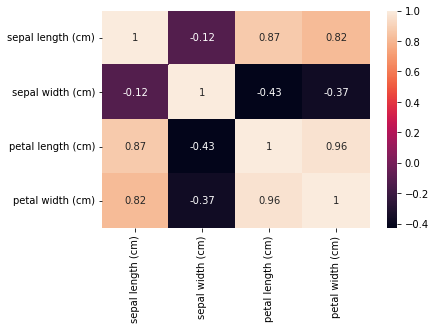

In [96]:
sns.heatmap(Data.corr(), annot = True, linecolor='black')

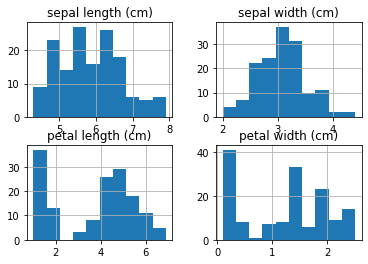

In [97]:
Data.hist()
plt.show()

## **Finding numbers of Clusters for Kmeans**

This is one of the most important task. We can find this Kmeans Clusters using *elbow* method.

In [ ]:
# Settin the data 3 Features
x=Data.iloc[:,0:3].values

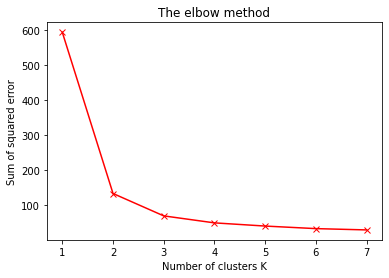

In [98]:


css=[]

# Finding inertia on various k values
for i in range(1,8):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 100, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)  
    #inertia sum of the squared distance between centroid and each member of the cluster.
    #n_init  Number of time the k-means algorithm will be run with different centroid seeds
    #max_iter Maximum number of iterations of the k-means algorithm for a single run
    
plt.plot(range(1, 8), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of squared error') 
plt.show()



From one can clearly see that according to the elbow method most accurate value for number of cluseter is 3. 

## **Applying KMeans Classifier**

In [99]:
#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

## **Visualizing the Clusters**




In [100]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     ],
       [5.84655172, 2.73275862, 4.3637931 ],
       [6.83571429, 3.06428571, 5.6547619 ]])

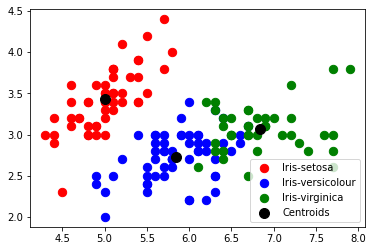

In [101]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 70, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 70, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 70, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

#**2 Features**

In [110]:
x2=Data.iloc[:,0:2].values

In [114]:
kmeans2 = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10)

y_kmeans2 = kmeans2.fit_predict(x2)

In [115]:
kmeans2.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

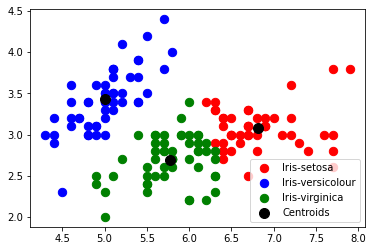

In [116]:
# Visualising the clusters - On the first two columns
plt.scatter(x2[y_kmeans2 == 0, 0], x2[y_kmeans2 == 0, 1], 
            s = 70, c = 'red', label = 'Iris-setosa')
plt.scatter(x2[y_kmeans2 == 1, 0], x2[y_kmeans2 == 1, 1], 
            s = 70, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x2[y_kmeans2 == 2, 0], x2[y_kmeans2 == 2, 1],
            s = 70, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

# **Thank You!**